In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [539]:
X, y = make_blobs(centers=5, random_state=42)

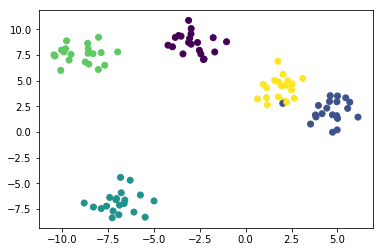

In [540]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [541]:
X.shape

(100, 2)

In [542]:
from sklearn.linear_model import LogisticRegression

In [543]:
model = LogisticRegression(multi_class="ovr")

In [544]:
model.fit(X, y)

/home/deepdroid/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [545]:
model.coef_

array([[ 0.15723405,  0.56059404],
       [ 1.60425863, -1.04393857],
       [-0.43230329, -1.21957208],
       [-0.46864287,  0.17569381],
       [ 0.25639893,  0.08000686]])

In [546]:
model.intercept_

array([-3.98821934, -1.27601734, -0.46895235, -4.02761111, -1.45528081])

In [549]:
model.predict_proba(X[:6])

array([[4.27442760e-04, 1.32330759e-03, 8.59942819e-01, 1.11682049e-01,
        2.66243816e-02],
       [4.70196217e-01, 2.57095374e-02, 3.47512197e-04, 2.28021694e-02,
        4.80944564e-01],
       [5.80701046e-01, 3.14077007e-07, 6.67786421e-05, 2.42565859e-01,
        1.76666002e-01],
       [2.57103962e-01, 6.11328800e-02, 2.12983725e-02, 5.24922881e-02,
        6.07972497e-01],
       [1.75903436e-01, 1.83415419e-10, 6.60562998e-03, 7.76590340e-01,
        4.09005932e-02],
       [6.99306348e-05, 6.82034005e-03, 8.71608563e-01, 1.04572507e-01,
        1.69286591e-02]])

In [614]:
class CustomLogisticReg:
    
    def __init__(self, lr=.1, max_iters=20):
        self.lr = lr
        self.max_iters = max_iters
    
    def fit(self, X, y):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        
        self.classes = np.unique(y)
        
        self.thetas = np.random.randn(len(self.classes), X.shape[1])
        
        for i, item in enumerate(self.classes):
            y_mod = (y==item).astype(int)
            self.__theta = self.thetas[i]
            for i in range(self.max_iters):
                self.gradient_accend(X, y_mod)
                
        self.coef_ = self.thetas[:, -2:]
        self.intercept_ = self.thetas[:, 0]
    
    def gradient_accend(self, X, y):
        delta_theta = self.gradient(X, y)
        self.__theta += delta_theta
        
    def gradient(self, X, y):
        yh = self.hypothesis(X)
        ya = y.reshape(-1, 1)
        diff = (yh - ya)
        
        dll2theta = np.dot(diff.T, X).mean(axis=0)
        return -dll2theta*self.lr
    
    def hypothesis(self, X):
        g = np.dot(X, self.__theta.T)
        return 1/(1 + np.exp(-g))
    
    def predict_proba(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        g = np.dot(X, self.thetas.T)
        sigmoid = 1/(1 + np.exp(-g))
        return sigmoid #sigmoid/sigmoid.sum(axis=1).reshape(-1,1) #if needs to convert to a valid prob distribution 
    
    def predict(self, X):
        values = self.predict_proba(X)
        return np.argmax(values, axis=1)
        
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean((yp==y))
        

In [615]:
model = CustomLogisticReg(lr=.0001, max_iters=1200)

In [616]:
model.fit(X, y)

(-10, 10)

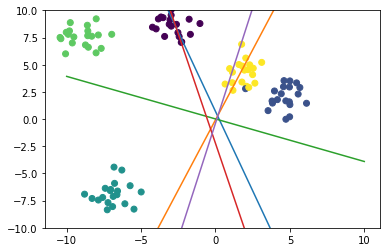

In [617]:
x1 = np.linspace(-10, 10, 10)
plt.scatter(X[:, 0], X[:, 1], c=y)
for ((m1, m2), c) in zip(model.coef_, model.intercept_):
    x2 = -(m1*x1)/m2 - (c/m2)
    plt.plot(x1, x2)
plt.ylim(-10, 10)

In [618]:
model.intercept_

array([-1.57289068, -0.55183439,  0.32443168, -3.4099881 , -1.60399641])

In [619]:
model.coef_

array([[  6.50476568,   2.22764079],
       [ 19.25229135,  -7.46657529],
       [ -9.44785227, -24.1400928 ],
       [ -6.14974534,  -1.52755862],
       [ 17.79586309,  -4.19306116]])

In [620]:
model.predict(X[:6])

array([2, 0, 3, 0, 3, 2])

In [621]:
model.predict_proba(X[:6])

array([[1.00672959e-23, 2.25198101e-38, 1.00000000e+00, 1.00000000e+00,
        1.61724359e-41],
       [1.00000000e+00, 3.58356746e-02, 8.37046914e-68, 2.28105587e-11,
        9.99984459e-01],
       [1.34011749e-01, 1.53277468e-53, 5.19634308e-78, 8.59653868e-01,
        5.78074392e-40],
       [9.99944627e-01, 4.97707497e-06, 5.00811539e-37, 4.55818150e-06,
        2.53550109e-02],
       [1.69181060e-19, 3.79769489e-96, 3.13504916e-36, 1.00000000e+00,
        2.21717121e-81],
       [3.03083520e-29, 1.92653318e-36, 1.00000000e+00, 1.00000000e+00,
        2.98045617e-43]])

In [622]:
model.score(X, y)

0.65